<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
  Import Libraries
</h1>


In [1]:
# Data Manipulation Libraries
import pandas as pd        
import numpy as np
# Visualization Libraries
import matplotlib.pyplot as plt  
import seaborn as sns            

# Machine Learning Preprocessing
from sklearn.feature_selection import SelectKBest, f_regression  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler     
from sklearn.preprocessing import MinMaxScaler        
from sklearn.preprocessing import LabelEncoder       
from sklearn.feature_selection import chi2           
from sklearn import metrics                           

# Feature Selection Algorithms
from skfeature.function.similarity_based import fisher_score  

# Multicollinearity and Statistical Analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# Deep Learning Libraries (TensorFlow and Keras)
import tensorflow as tf                     
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization  
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau  
from keras import layers                    
import keras                                
from keras.optimizers import Adam          
from keras.models import load_model         

# For Saving the Scaler
import joblib 

import sweetviz as sv

<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
    Loading and Exploring the dataset
</h1>


In [2]:
# Load the data  and reading the csv file
df = pd.read_csv("adm_data.csv")

In [3]:
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


<div style="background-color:#e0f4f7; padding:30px; border-radius:15px; font-family:'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#004d40; border: 2px solid #00796b; max-width: 800px; margin:auto;">
    <h4 style="color:#004d40; font-size:22px; margin-bottom:5px;">GRE (Graduate Record Examination)</h4>
    <h4 style="color:#004d40; font-size:22px; margin-bottom:5px;">SOP (Statement of Purpose)</h4>
    <h4 style="color:#004d40; font-size:22px; margin-bottom:5px;">LOR (Letter of Recommendation)</h4>
    <h4 style="color:#004d40; font-size:22px; margin-bottom:5px;">CGPA (Cumulative Grade Point Average)</h4>
</div>


In [4]:
# check the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
# Find duplicate rows
duplicates = df.duplicated().sum()

duplicates

0

In [7]:
# Removing the "Serial No", this is useless column and does not mean anything.
df = df.drop("Serial No.", axis=1)

<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
    Visualization
</h1>


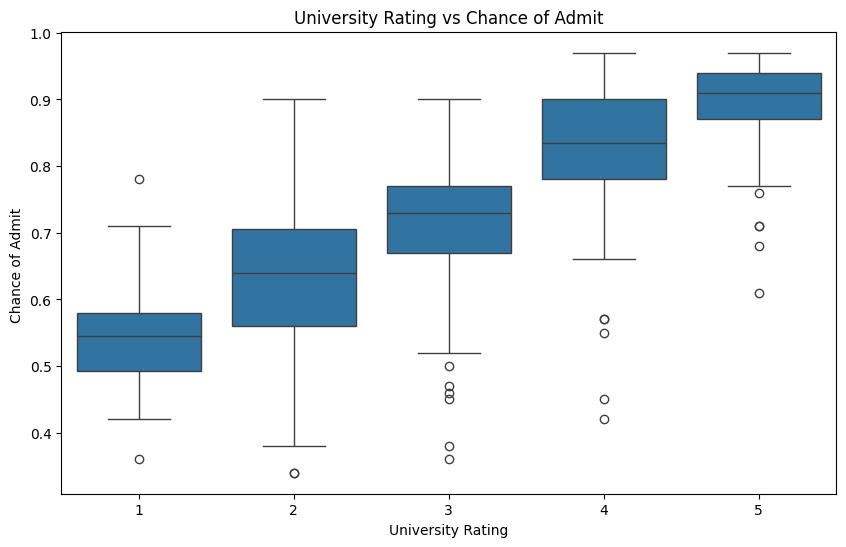

In [8]:
# Visualizing th University Rating vs chance of admit column
plt.figure(figsize=(10, 6))
sns.boxplot(x="University Rating", y="Chance of Admit ", data=df)
plt.title("University Rating vs Chance of Admit")
plt.show()

## <span style="color: #20C997;">Personal Analysis</span>
That shows that to get admission the top universities is hard, the chance for the first. The median chance of admission for universities with s rating of 1 is lower compared to others.

In [9]:
from ydata_profiling import ProfileReport


# Create a profile report
profile = ProfileReport(df, title="adam.cvs")

# Export the report to an HTML file
profile.to_file("Admission.html")

# To view directly in a Jupyter Notebook, use:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

It shows that CGPA, GRE Score, and TOEFL Score have strong positive correlations with the "Chance of Admit." SOP, LOR, and Research also have noticeable correlations but are weaker.There is multicollinearity, so I need to remove extra similar features to improve my model. 

<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
    Data Preprocessing
</h1>


In [10]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [11]:
# I need multiply the chance of admit column by 100 to make it easier to understand
df["Chance of Admit "] = df["Chance of Admit "] * 100

# Display the updated dataframe
df.head()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,92.0
1,324,107,4,4.0,4.5,8.87,1,76.0
2,316,104,3,3.0,3.5,8.00,1,72.0
3,322,110,3,3.5,2.5,8.67,1,80.0
4,314,103,2,2.0,3.0,8.21,0,65.0


In [12]:
# Check the Multicollinearity between the columns
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
vif_data


,feature,VIF
0,GRE Score,1607.928316
1,TOEFL Score,1373.804681
2,University Rating,22.998812
3,SOP,38.051007
4,LOR,39.774185
5,CGPA,1333.886926
6,Research,3.211789
7,Chance of Admit,108.476950


Here four columns have high multicollinearity.

In [14]:
# let's check the ootliers in the dataset with Q1, Q3 and IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
outliers = pd.DataFrame(outliers, columns=["Outliers"])
outliers

,Outliers
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,1
CGPA,1
Research,0
Chance of Admit,2


Only three columns have outliers values

In [15]:

for col in df.columns:
    median = df[col].median()
    df[col] = np.where(df[col] > (Q3[col] + 1.5 * IQR[col]), median, df[col])
    df[col] = np.where(df[col] < (Q1[col] - 1.5 * IQR[col]), median, df[col])

# Check the outliers after handling
outlier = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
outliers = pd.DataFrame(outlier, columns=["Outliers"])
outlier


GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [75]:
#Combine by averaging the values
#df['GRE_TOEFL_Average'] = (df['GRE Score'] + df['TOEFL Score'])
#df = df.drop(['GRE Score', 'TOEFL Score'], axis=1)

#df = df.drop(['TOEFL Score'], axis=1)

In [16]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.45875,8.60345,0.547500,72.630000
std,11.473646,6.069514,1.143728,1.006869,0.89003,0.58946,0.498362,13.997605
min,290.000000,92.000000,1.000000,1.000000,1.50000,7.20000,0.000000,36.000000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.17750,0.000000,64.000000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.61500,1.000000,73.000000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.06250,1.000000,83.000000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.92000,1.000000,97.000000


In [77]:
# Since my dataset is small, I will use CTGAN to generate new data


#from ctgan import CTGAN

# I used the CTGAN model to generate data but model generated data which does not make sense
# for example the chance of admit is above 100 percent or the GRE score is above 340
# So before using the generated data I need to define acceptable ranges for the columns

# Define the acceptable ranges for the columns
#def ranges(df):
#    df["GRE Score"] = df["GRE Score"].clip(290, 340)
#   df["TOEFL Score"] = df["TOEFL Score"].clip(92, 120)
#   df["University Rating"] = df["University Rating"].clip(1, 5)
#    df["SOP"] = df["SOP"].clip(1, 5)
#
#    df["LOR "] = df["LOR "].clip(1.50, 5)
#    df["CGPA"] = df["CGPA"].clip(7.20, 9.92)
#    df["Research"] = df["Research"].clip(0, 1)
#    df["Chance of Admit "] = df["Chance of Admit "].clip(36, 97)
#    
#    return df

# I will Generate 1000 samples
#ctgan = CTGAN()
#ctgan.fit(df, epochs=600)

# Generate 600 samples
#samples = ctgan.sample(600)

# Apply clipping to the generated samples to ensure realistic values
#samples = ranges(samples)

# Combine the clipped synthetic samples with the original dataset
#df = pd.concat([df, samples])

I used to CTAGN Tool to generated 600 more rows. But with new dataset, the ANN regression model does not have good performing, even I tried do the Feature Engineering, I think CTAGN can not have good performing so I will try another tool.


I used the CTAGN Tool to generate new data while I trained the ANN regression with that, but I could not get result, so it could not generate reliable data.

In [17]:
from sdv.datasets.demo import download_demo
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.metadata.single_table import SingleTableMetadata
from sdv.evaluation.single_table import evaluate_quality


# Create metadata for the dataset
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=df)


# Initialize the synthesizer
synthesizer = GaussianCopulaSynthesizer(metadata)

# Fit the synthesizer to the real data
synthesizer.fit(data=df)

# Generate synthetic rows (e.g., 1000 rows)
new_data = synthesizer.sample(num_rows=1000)

# Evaluate the quality of the generated data
quality_report = evaluate_quality(df, new_data, metadata)

c:\Users\murta\OneDrive\Desktop\ML&DE\Third-semester\Deep_Learning\.venv\lib\site-packages\sdv\single_table\base.py:120: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
c:\Users\murta\OneDrive\Desktop\ML&DE\Third-semester\Deep_Learning\.venv\lib\site-packages\sdv\single_table\base.py:105: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 8/8 [00:00<00:00, 610.77it/s]|
Column Shapes Score: 92.9%

(2/2) Evaluating Column Pair Trends: |██████████| 28/28 [00:00<00:00, 175.13it/s]|
Column Pair Trends Score: 82.56%

Overall Score (Average): 87.73%



In [36]:
new_data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,328.00,113.00,3.00,4.40,3.40,9.23,1.00,89.86
1,305.00,100.00,3.00,4.10,3.60,7.89,1.00,54.82
2,333.00,109.00,2.00,3.90,4.50,8.92,1.00,85.07
3,340.00,119.00,4.00,5.00,5.00,9.66,1.00,93.68
4,321.00,113.00,2.00,4.40,4.90,9.05,1.00,82.69


In [37]:
new_data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,316.27,107.09,3.11,3.32,3.65,8.59,0.54,72.06
std,11.76,6.19,1.17,1.19,1.03,0.59,0.50,14.71
min,290.00,92.00,1.00,1.00,1.50,7.21,0.00,36.00
25%,307.00,103.00,2.00,2.40,2.80,8.17,0.00,61.25
50%,317.00,107.00,3.00,3.50,3.90,8.59,1.00,73.62
75%,326.00,112.00,4.00,4.40,4.60,9.03,1.00,84.02
max,340.00,120.00,5.00,5.00,5.00,9.92,1.00,97.00


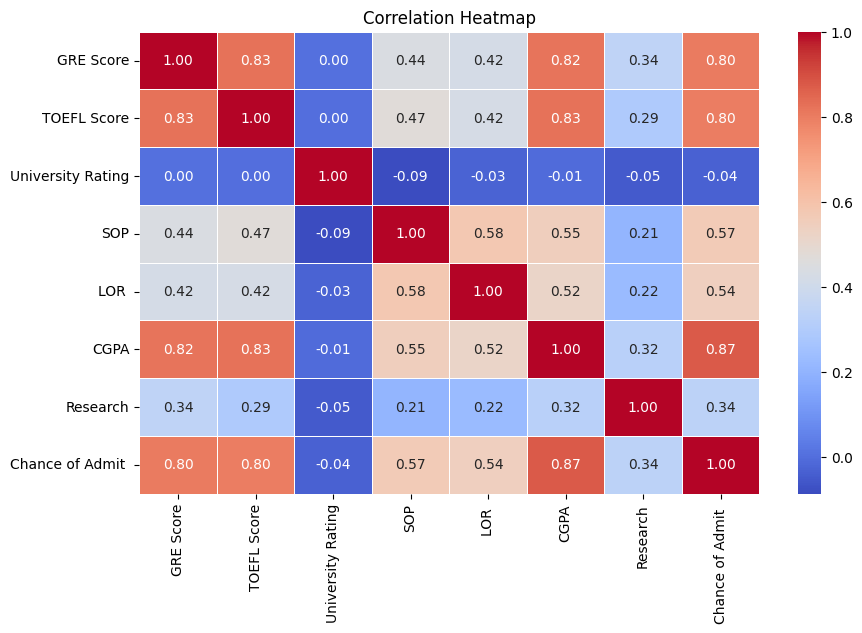

In [21]:
# Check the correlation between the columns after generating the data
plt.figure(figsize=(10, 6))
sns.heatmap(new_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.savefig('correlation_heatmap.png')  # Optional: Save it to view later
plt.show()

The heatmap shows CGPA, GRE, and TOEFL scores have strong correlation.

In [27]:
# let's check the ootliers in the dataset with Q1, Q3 and IQR
Q1 = new_data.quantile(0.25)
Q3 = new_data.quantile(0.75)
IQR = Q3 - Q1
outlier_ = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
outlier_

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

After Generating data wth SDV, there are not any outliers, it shows that SDV works better than CTGAN.

In [28]:
# Defining feature set (X) by dropping the target column
X = new_data.drop(columns=["Chance of Admit "], axis=1)
y = new_data["Chance of Admit "]

In [29]:
# convert all continuous variables to integer,
# and convert all negative numbers to 0
X_cat = X.astype(int)
X_cat = X_cat.clip(lower=0)

chi_features = SelectKBest(chi2, k=len(X_cat.columns))

# fit our data to the SelectKBest
best_features = chi_features.fit(X_cat, y.astype(int))

# use decimal format in table
pd.options.display.float_format = '{:.2f}'.format

# the higher the score, the more effect that column has on the target
df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns, df_features], axis=1)
f_scores.columns = ['Features', 'Score']
f_scores.sort_values(by='Score', ascending=False)


,Features,Score
0,GRE Score,292.56
1,TOEFL Score,233.96
3,SOP,157.82
4,LOR,116.90
6,Research,71.10
5,CGPA,36.09
2,University Rating,35.02


GreScore, TOEFL, SOP have more effect on the target column

In [30]:
# Check the Multicollinearity between the columns
vif_data = pd.DataFrame()
vif_data["feature"] = new_data.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
vif_data


,feature,VIF
0,GRE Score,1571.71
1,TOEFL Score,1371.96
2,University Rating,22.81
3,SOP,38.10
4,LOR,38.75
5,CGPA,1287.20
6,Research,3.15
7,Chance of Admit,105.78


GRE Score, TOEFL Score and CGPA have high multocollinearity.

In [31]:
df_multi = new_data[['GRE Score', 'TOEFL Score', 'CGPA']]


X_cat = df_multi.astype(int)
X_cat = X_cat.clip(lower=0)

chi_features = SelectKBest(chi2, k=len(X_cat.columns))
best_features = chi_features.fit(X_cat,y.astype(int))

# use decimal format in table
pd.options.display.float_format = '{:.2f}'.format

# the higher the score, the more effect that column has on the target
df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(df_multi.columns)
f_score = pd.concat([df_columns,df_features],axis=1)
f_score.columns = ['Features','Score']
f_score.sort_values(by='Score',ascending=False)

,Features,Score
0,GRE Score,292.56
1,TOEFL Score,233.96
2,CGPA,36.09


In [32]:
# After finding the score of each column, I will find the total score of each column
total_score =  f_score['Score'].sum()
total_score

562.6034113348763

In [33]:
# Calculate normalized weights and store them in the list
weights = [score / total_score for score in f_score['Score']]

# I need to sort the weights values and create a new  dataframe to store the weights and each column 
weights.sort(reverse=True) 
df_weights = pd.DataFrame(weights, columns=['Weights'])
df_weights['Features'] = f_score['Features']
df_weights

,Weights,Features
0,0.52,GRE Score
1,0.42,TOEFL Score
2,0.06,CGPA


In [34]:
# After Finding the weight of each column, I will a create a new column 'photometric_filters' to store the weighted average of the photometric data columns
df['Admision Score'] = (df['GRE Score'] * df_weights['Weights'][0]) + (df['TOEFL Score'] * df_weights['Weights'][1]) + (df['CGPA'] * df_weights['Weights'][2])
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admision Score
0,337.00,118.00,4.00,4.50,4.50,9.65,1.00,92.00,224.93
1,324.00,107.00,4.00,4.00,4.50,8.87,1.00,76.00,213.55
2,316.00,104.00,3.00,3.00,3.50,8.00,1.00,72.00,208.08
3,322.00,110.00,3.00,3.50,2.50,8.67,1.00,80.00,213.74
4,314.00,103.00,2.00,2.00,3.00,8.21,0.00,65.00,206.64


In [35]:
# Since I have created a new column "Admision Score" I will drop the columns "GRE Score", "TOEFL Score" and "CGPA"
df = df.drop(['GRE Score', 'TOEFL Score', 'CGPA'], axis=1)
df.head()

,University Rating,SOP,LOR,Research,Chance of Admit,Admision Score
0,4.00,4.50,4.50,1.00,92.00,224.93
1,4.00,4.00,4.50,1.00,76.00,213.55
2,3.00,3.00,3.50,1.00,72.00,208.08
3,3.00,3.50,2.50,1.00,80.00,213.74
4,2.00,2.00,3.00,0.00,65.00,206.64


In [46]:
# save the data to a new csv file
df.to_csv('Admission_data.csv', index=False)

In [47]:
# Load the data
data = pd.read_csv("Admission_data.csv")

In [48]:
data.head()

,University Rating,SOP,LOR,Research,Chance of Admit,Admision Score
0,4.00,4.50,4.50,1.00,92.00,224.93
1,4.00,4.00,4.50,1.00,76.00,213.55
2,3.00,3.00,3.50,1.00,72.00,208.08
3,3.00,3.50,2.50,1.00,80.00,213.74
4,2.00,2.00,3.00,0.00,65.00,206.64


In [49]:
# Define the feature set (X) and the target (y)
X = data.drop(columns=["Chance of Admit "], axis=1)
y = data["Chance of Admit "]

In [50]:
# convert all continuous variables to integer,
# and convert all negative numbers to 0
X_cat = X.astype(int)
X_cat = X_cat.clip(lower=0)

chi_features = SelectKBest(chi2, k=len(X_cat.columns))

# fit our data to the SelectKBest
best_features = chi_features.fit(X_cat, y.astype(int))

# use decimal format in table
pd.options.display.float_format = '{:.2f}'.format

# the higher the score, the more effect that column has on the target
df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns, df_features], axis=1)
f_scores.columns = ['Features', 'Score']
f_scores.sort_values(by='Score', ascending=False)


,Features,Score
0,University Rating,106.18
4,Admision Score,99.34
1,SOP,80.40
3,Research,77.88
2,LOR,52.56


After combining those column which had multicollinearty,  University Rating, Admission Score, SOP have effect on the target value

In [51]:

sc = MinMaxScaler()
sc.fit(X)

X = sc.transform(X) 


In [52]:

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=101)


X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=101)


In [53]:
# Displaying the number of samples in each data split
print(f"Training data samples: {len(X_train)}")
print(f"Test data samples: {len(X_test)}")
print(f"Validation data samples: {len(X_val)}")

Training data samples: 300
Test data samples: 50
Validation data samples: 50


<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
    Creating neural network structure
</h1>


In [55]:
variable_amount = X.shape[1]

In [65]:


# Save the best model based on validation loss
mc = ModelCheckpoint('best_model.regression2.keras', monitor='val_loss', mode='min', save_best_only=True)
#Define the early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=100, mode='min', restore_best_weights=True)

# Define the neural network model
model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(variable_amount,)),  
    Dense(16, activation='elu'),
    #BatchNormalization(),
    Dropout(0.01),
    Dense(32, activation='elu'),
   # BatchNormalization(),
    Dropout(0.02),
    #Dense(16, activation='elu'),
    Dense(1) 
    ]
)

optimal_lr =0.0001
# Compile the model using Adam optimizer and mean squared error (MSE) loss
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model architecture summary
model.summary()

c:\Users\murta\OneDrive\Desktop\ML&DE\Third-semester\Deep_Learning\.venv\lib\site-packages\keras\src\layers\normalization\batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_2           │ (None, 5)              │            20 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693 (2.71 KB)

 Trainable params: 683 (2.67 KB)

 Non-trainable params: 10 (40.00 B)

<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
    Train the Neural network with your data
</h1

In [66]:
# List of callbacks 
callback_list = [mc, early_stop]

# Fit the model on training data, using validation data for evaluation, with specified callbacks
history = model.fit(x=X_train, y=y_train, epochs=1000, batch_size=64, validation_data=(X_val, y_val), callbacks=callback_list)


Epoch 1/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 5669.3525 - val_loss: 5035.5752
Epoch 2/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5438.3159 - val_loss: 5015.1738
Epoch 3/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5559.6689 - val_loss: 4993.3096
Epoch 4/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5608.0229 - val_loss: 4970.6455
Epoch 5/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5619.0127 - val_loss: 4946.6431
Epoch 6/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5468.9023 - val_loss: 4920.6523
Epoch 7/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5576.2212 - val_loss: 4892.8516
Epoch 8/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5523.7002 - val_loss: 4862.6831
Epoch 9/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5247.8911 - val_loss: 4830.3311
Epoch 10/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5429.1841 - val_loss: 4795.5967
Epoch 11/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5350.4214 - val_loss: 4758.22

In [78]:
# save the model
model.save('Admission_model.keras')

<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
    Evaluating Model
</h1

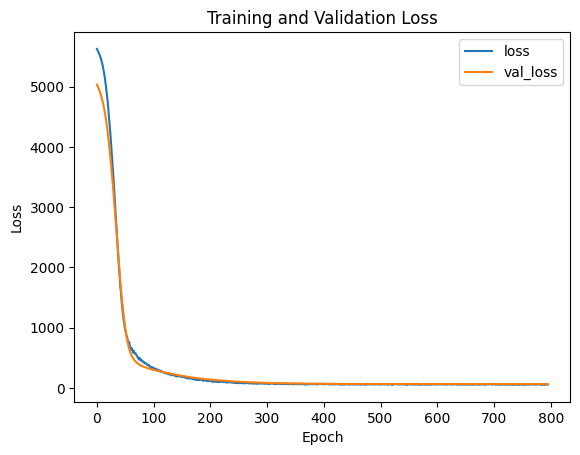

In [67]:

# Visualize the training and validation loss
losses = pd.DataFrame(history.history)
losses[['loss', 'val_loss']].plot()
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

## <span style="color: #20C997;">Personal Analysis</span>
The training and validation losses get smaller and stay steady after 200 epochs. This means the model is learning well and works well on new data.

In [68]:
# Load the best saved model from the file 'best_model.regression2.keras'
model = load_model('best_model.regression2.keras')

In [69]:
# compare the final model loss/evaluation values
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
53.3188362121582

Train data evaluation:
46.001163482666016


## <span style="color: #20C997;">Personal Analysis</span>
Train loss  is  better than test loss , showing good learning with no overfitting.

In [70]:
test_predictions = model.predict(X_test)

# reshape the data for easier comparison table
test_predictions = pd.Series(test_predictions.flatten())
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df.reset_index(drop=True), test_predictions.reset_index(drop=True)], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

pred_df.head(9)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


,Test True Y,Model Predictions
0,65.00,70.37
1,53.00,61.61
2,74.00,76.74
3,71.00,58.23
4,70.00,64.00
5,67.00,65.68
6,76.00,78.40
7,93.00,91.63
8,79.00,80.17


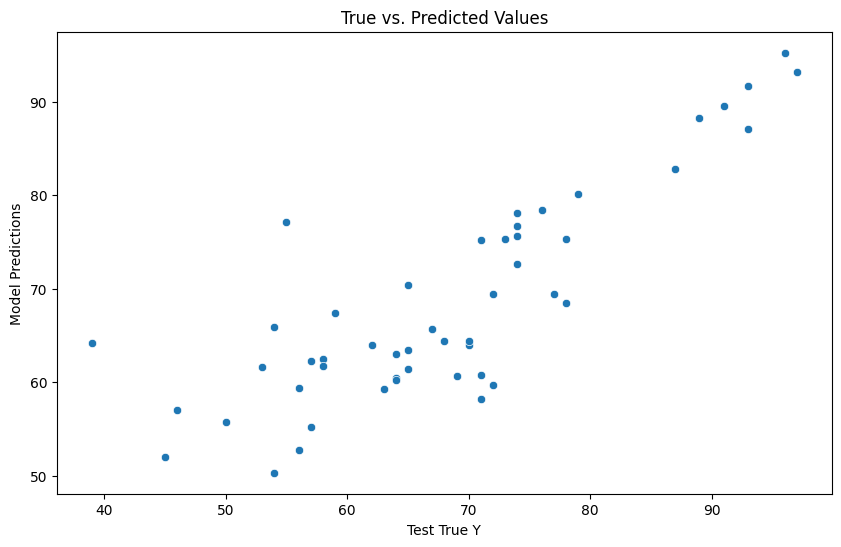

In [71]:
# Create a scatter plot with a regression line  and true vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)
plt.title("True vs. Predicted Values")
plt.show()


## <span style="color: #20C997;">Personal Analysis</span>
The plot shows true values compared to predicted values. Most points are close to a straight line, meaning the model predicts good.

In [72]:
# MAE - Mean Absolute Error
mae = metrics.mean_absolute_error(y_test, test_predictions)
print(f"MAE: {mae:.2f}")

# MSE - Mean Squared Error
mse = metrics.mean_squared_error(y_test, test_predictions)
print(f"MSE: {mse:.2f}")

# RMSE - Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")

# R-squared
r2 = metrics.r2_score(y_test, test_predictions)
print(f"R-squared: {r2:.2f}")


MAE: 5.41
MSE: 53.32
RMSE: 7.30
R-squared: 0.70


## <span style="color: #20C997;">Personal Analysis</span>
The model performs reasonably well, generalizes without overfitting, and gives predictions close to true values.

<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
    Trying the Model in Practice
</h1

In [73]:
df.head(5)

,University Rating,SOP,LOR,Research,Chance of Admit,Admision Score
0,4.00,4.50,4.50,1.00,92.00,224.93
1,4.00,4.00,4.50,1.00,76.00,213.55
2,3.00,3.00,3.50,1.00,72.00,208.08
3,3.00,3.50,2.50,1.00,80.00,213.74
4,2.00,2.00,3.00,0.00,65.00,206.64


In [79]:
# Lets test the model with new data 
new_data = pd.DataFrame({
    "University Rating": [5],
    "SOP": [5],
    "LOR ": [4.5],
    "Research": [1],
    "Admision Score": [220.50]
})

# convert to dataFrame
new_data = pd.DataFrame(new_data)

# Scale the new data
new_data = sc.transform(new_data)



In [81]:
# Fit the new data to the model
new_data_prediction = model.predict(new_data)
new_data_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[91.67853]], dtype=float32)

In [82]:
# Display the prediction
print(f"The chance of admission is: {new_data_prediction[0][0]:.2f}%")

The chance of admission is: 91.68%


In [83]:
# Save the scaler
joblib.dump(sc, 'scaler.pkl')

['scaler.pkl']